# Decision Trees

In this course we will explore a new **classification** model, called **Decision Trees**.

It is:
- one of the oldest ML algorithm
- pretty robust
- quite intuitive

We will then dig into an extension of the Decision Trees: the **Random Forests**

# I. Trees Intuition

## I.1. Trees and linearly separable data

Trees can be efficient on non linearly separable data.

Let's have a toy example: what would be the conditions to sell a lot of ice creams on the beach?

- Warm temperature
- Sunny weather

We can draw this dataset on a simple scatter plot:

![](images/ice_cream_data.png)

Would you say this data is linearly separable? And why?

Though not linearly separable, this data can be well classified with a sequence of two questions:
- is the temperature warm?
- is the weather sunny?

Another way to represent it is the following:
<center>
    <img src="images/ice_cream_tree.png" width=400>
</center>


## I.2. Vocabulary

On this tree, we can see three different objects:
- the **root node** is the first node, here `warm?`
- a **decision node** is just any node with two (or sometimes more) branches
- a **leaf** is does not contain any split, it contains a final prediction

## I.3. An example of more complex tree

<center>
    <img src="https://drive.google.com/uc?export=view&id=1am_borVWERNA0BvOgsIy2HPqwJexAdD7" width="1000">
</center>

# II. Decision trees for classification

## II.1. Greedy algorithm

Our tree is based on a so called **greedy algorithm**: meaning it only tries to optimize one step at a time.

In our case, it means our tree is not optimized globally, but one node at a time.

This can be seen as a recursive algorithm:
1. take all samples in a node
2. find a threshold in a feature that minimizes the disorder
3. split this into two new nodes
4. go back to 1. until your node is pure, thus becoming a leaf

The only question here is: how do we measure disorder?

## II.2. Disorder measurement

There are several ways to measure disorder. We will here cover two of them, the most used in decision trees:
- Entropy
- Gini impurity

### Entropy

One of the most common ways of measuring disorder is using **entropy**.

Entropy is a generic word, used in various fields like physics (thermodynamics) or computer science.

It always refers to a sort of disorder, and can be expressed as follow:

$$
E = -\sum p_i log_2 p_i
$$

Where $p_i$ is defined as the proportion of element $i$ in a subset.

Let's consider the following example:
<center>
    <img src="images/root_node.png">
</center>

The entropy would be:

$$
E = - \frac{3}{10} log_2 \frac{3}{10} - \frac{7}{10} log_2 \frac{7}{10} \simeq 0.88
$$

Because we have:
- $p_{blue} = \frac{3}{10}$, since we have 3 blue balls out of 10
- $p_{red} = \frac{7}{10}$, since we have 7 blue balls out of 10

This entropy has several interesting properties for disorder measurement:
- if $p_{blue} = 0$, then $p_{red} = 1$ and $ E = 0 $
- if $p_{blue}$ = $p_{red}$ = 0.5, then $ E = 1$

<center>
    <img src="images/Entropy.png">
</center>

### Gini impurity

Gini impurity is also a disorder measurement. The formula is the following:

$$
G(f)=\sum f_{i}(1-f_{i})=\sum (f_{i}-{f_{i}}^{2})=\sum f_{i}-\sum {f_{i}}^{2}=1-\sum {f_{i}}^{{2}}
$$

Where this time the proportion of element $i$ is defined by $f_i$.

On our same example:

<center>
    <img src="images/root_node.png">
</center>

The gini impurity would be:

$$
G = 1 - \left(\frac{3}{10}\right)^2 - \left(\frac{7}{10}\right)^2 = 0.42
$$

Once again we have our extreme cases:
- if $f_{blue} = 0$, then $f_{red} = 1$ and $ G = 0 $
- if $f_{blue}$ = $f_{red}$ = 0.5, then $ G = 0.5$

## II.3. Loss function

Finally, in order to split a node optimally, we need to compute the a loss to minimize is the measure of the **disorder decrease** thanks to our split.

To compute this loss, we consider the two children nodes, that we will call *left* and *right*.

The formula is the following:

$$
\mathcal{L} = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m}G_{right}
$$

Where:
- $m$, $m_{left}$ and $m_{right}$ are the number of samples in each nodes respectively
- $G_{left}$ and $G_{right}$ are the *Gini impurities* of *left* and *right* nodes

> Of course, one can use entropy instead of gini impurity

Imagine we choose a split decision, we then have a **parent node** and **two children nodes**:
<center>
    <img src="images/split_nodes.png" width="400">
</center>

Thus here the loss $\mathcal{L}$ would be:

$$
\mathcal{L} = \frac{3}{10}0.44 + \frac{7}{10} 0.41 = 0.42
$$

The algorithm will find the split that minimizes this entropy to create the new nodes.

Then, until we reach a limit (pure leaves or any given constraint), it will recursively keep splitting the data:
- When the leaf is pure, then the prediction is the only class remaining in the leaf
- When the leaf is not pure, then the prediction is the most represented class in the leaf

## II.4. Regularization of trees

Decision trees are available in scikit-learn, with the following signature:
```python

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

```

Let's have a look at some of the parameters:

- **criterion**: The disorder measurement:`gini` or `entropy` 

- **max_depth**: The maximum depth of the tree: **smaller value leads to greater regularization**

- **min_samples_split**: The minimum number of samples required to split a node

- **min_samples_leaf**: The minimum number of samples required to be at a leaf node    

- **min_impurity_decrease**: A node will be split if this induces a decrease of the impurity
    greater than or equal to this value.

## II.5. Implementation

Let's apply a decision tree to the classic Iris dataset:

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# Load the dataset
X, y = load_iris(return_X_y=True)
X_small = X[:,:2] # Keep only 2 features for visualization
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_small, y, random_state=0)

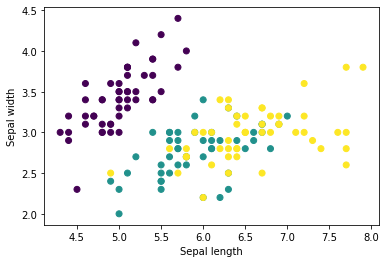

In [3]:
import matplotlib
from matplotlib import pyplot as plt

# Plot the training points
plt.scatter(X_small[:, 0], X_small[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

The process remains the same:
- Import the library from scikit-learn
- Instantiate the model with the proper hyperparameters
- Fit the model on the training set
- Predict on the test set and evaluate

In [4]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the model
dt = DecisionTreeClassifier()
# Fit the model
dt.fit(X_train, y_train)
# Predict on new data
y_pred = dt.predict(X_test)
# Compute the accuracy
print('accuracy:', dt.score(X_test, y_test))

accuracy: 0.6578947368421053


### The decision boundaries

We can also plot the decision boundaries of our tree with the following code:

> N.B.: you don't have to understand or be able to recode this by yourself

In [14]:
import numpy as np
from matplotlib import pyplot as plt

def plot_decision_boundaries(dt):
    # Create figure to draw chart
    plt.figure(2, figsize=(8, 6))

    # We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size of the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Retrieve predictions for each point of the grid
    Z_dt = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_dt = Z_dt.reshape(xx.shape)

    # Plot the decision boundary (label predicted assigned to a color)
    plt.pcolormesh(xx, yy, Z_dt, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

    # Format chart
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.show()

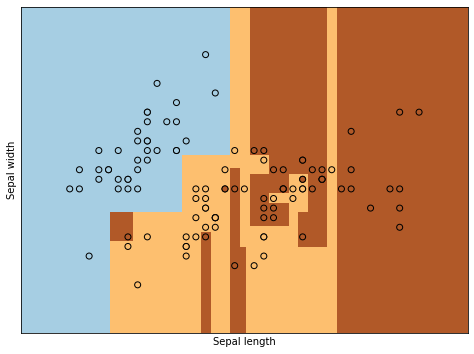

In [15]:
plot_decision_boundaries(dt)

One can see that our tree seems to overfit: the regions do not seem to be able the generalize well. 

Let's try to add regularization with the `max_depth` hyperparameter and display the new decision boundaries.

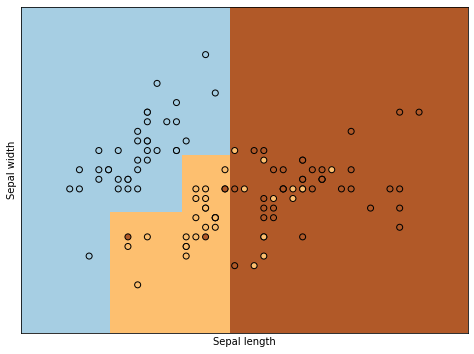

In [16]:
# Instantiate the model
dt_regul = DecisionTreeClassifier(max_depth=3)
# Fit the model
dt_regul.fit(X_train, y_train)
# Plot the decision boundaries
plot_decision_boundaries(dt_regul)

We can see here the effects of regularization: The model learns less complicated, thus is more regularized.

### Displaying the tree

`sklearn` even allows us to visualize the tree. By exporting it to graphviz format and opening it with another library called `graphviz` (you may need to install it by running `pip install graphviz`).

In [8]:
from sklearn.tree import export_graphviz
import graphviz

# We load iris data again to retrieve features and classes names
iris = load_iris()

# We export the tree in graphviz format 
dot_data = export_graphviz(dt_regul,
                           out_file=None,
                           feature_names=iris.feature_names[:2],  
                           class_names=iris.target_names,  
                           filled=True, rounded=True)

# We load the tree again with graphviz library in order to display it
graph = graphviz.Source(dot_data)

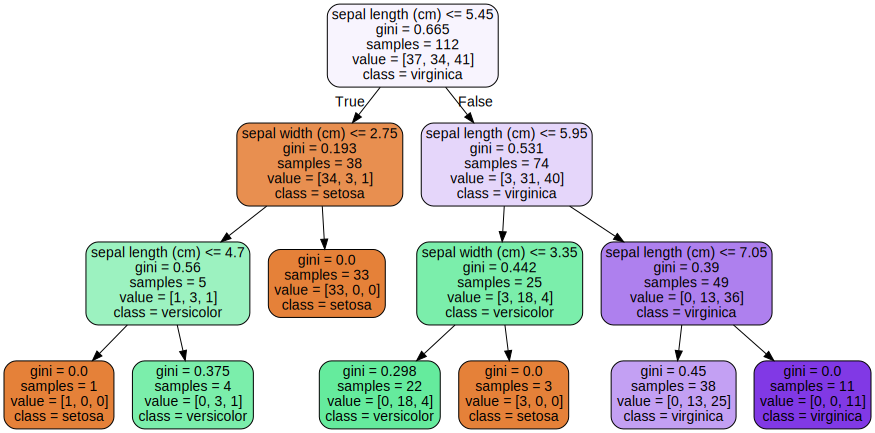

In [9]:
graph

### Interpretability

Interpretability is quite easy with trees, using the `.feature_importances_` attribute.

The feature importance is computed as the disorder reduction brought by each feature in the tree.

In [10]:
dt_regul.feature_importances_

array([0.81721868, 0.18278132])

One can also plot it as a bar chart:

Text(0.5, 1.0, 'Features importance')

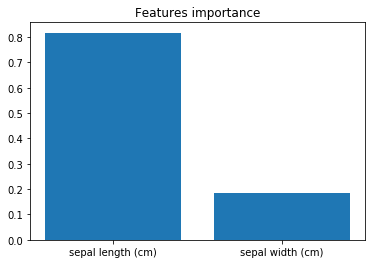

In [11]:
plt.bar(iris.feature_names[:2], dt_regul.feature_importances_)
plt.title('Features importance')

## III. Decision trees for regression

Decision trees can be used for regression too.

Instead a predicting the most represented class in a leaf, the tree will now **predict the average values in a leaf**.

In order to do so, we just have to change one thing: the disorder measurement.

## III.1. Loss for regression

The algorithm still has to find the split that minimizes a loss.

Instead of computing the Gini impurity or the Entropy loss, we will compute the Mean Squared Error (yes, not original).


Thus, the loss function we now be the following:

$$
\mathcal{L} = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m}MSE_{right}
$$

Where $MSE$ stands for mean squared error.

Let's take an example to illustrate:
<center>
    <img src='images/split_regression.png' width=400>
</center>

On this example, the loss would be the following:

$$
\mathcal{L} = \frac{3}{10} 0.66 + \frac{7}{10} 4.98 \simeq 3.67
$$

And if we stopped here (because a max depth of 1 for example):
- the left leaf would predict 16
- the right leaf would predict 13.1

## III.2. Implementation

Decision trees for regression are also available in scikit-learn, with the following signature:
```python
class sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)
```

As you can see, most of the hyperparameters are similar to the ones for classification trees, like `max_depth` or `min_samples_split`.

Now the criterion takes as values:
- `mse` for mean squared error
- `mae` for mean absolute error
- `friedman_mse` for Friedman MSE, a weighted MSE (see [here](https://datascience.stackexchange.com/questions/66062/what-is-the-difference-between-freidman-mse-and-mse) for more details)